# Prelab 4 Stochastic Differential Equations

> Yujia, Ethan, and Vincent adapted from materials developed by Diane and Elizabeth
> 
> 2024/4/11 (Week 4)

__The notebook is not graded because there is no coding tasks for this week's prelab!__


## Stochastic Differential Equations

Stochastic differential equations, or SDEs, are (loosely speaking) ordinary differential equations that include __random variable(s)__.
E.g. we can introduce noise into a simple gene expression model

<img alt="Simple gene expression" src="https://github.com/dschnitkey/BIOS20236/blob/main/simplyregulated.png?raw=true" width="300px" />

$$
\frac{dX}{dt} = \beta - \alpha X + A\xi(t)
$$

Here $\xi(t)$ is a random process. You can think of it as __Brownian motion__.
When your computer integrates such an equation, it will draw different numbers from white noise in place of $\xi(t)$.
These random numbers have a mean of 0 and variance of 1.

A is the **noise strength** that determines how big these fluctuations are. When A = 0, you get back to the original deterministic model.

### SDE in Python

First, you want to install the `sdeint` package. Unfortunately it is not included in the Anaconda distribution so you'll have to install it manually through `pip`.

In your terminal (where to find it is OS dependent. Google or ChatGPT should give your some clue) run command

`pip install sdeint`

and you are good to go! The Prelab video also walks you through the installation.

Run the following cell. It wraps up SDE solver and exposes an interface that resembles `odeint`

In [2]:
from sdeint import itoint

def sdeint_wrapper(rhs, u0, tspan, A, args):
    sol = itoint(lambda x, t: rhs(x, t, *args),
                 lambda x, t: A,
                 u0, tspan)
    return sol

Here is an example to solve the SDE model for simple gene expression!

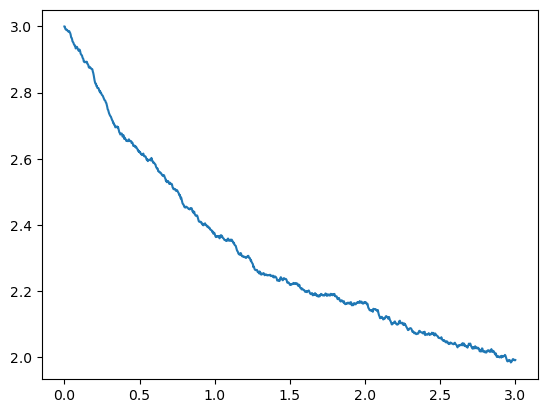

In [3]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint

def rhs_simple(x, t, beta, alpha):
    return beta - alpha*x

beta = 2
alpha = 1
A = 0.05

tspan = np.linspace(0, 3, 1001)
x0 = 3

args = (beta, alpha)
sol = sdeint_wrapper(rhs_simple, x0, tspan, A, args)

p, ax = plt.subplots()
ax.plot(tspan, sol, label="Noisy")

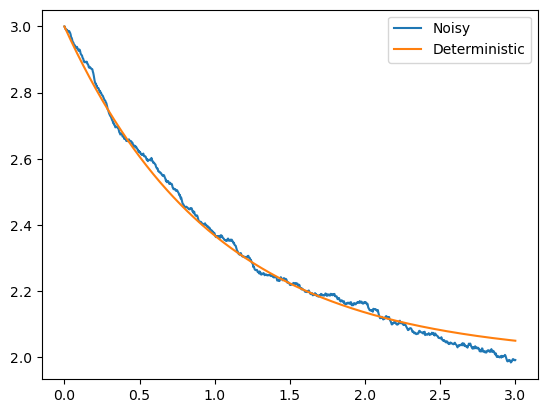

In [4]:
sol2 = odeint(rhs_simple, x0, tspan, args)

ax.plot(tspan, sol2, label="Deterministic")
ax.legend()
p